In [649]:
# Librerías para ciencia de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


## Hotel Booking Dataset – Descripción de los features

| Feature | Description |
|--------|-------------|
| hotel | Hotel type: H1 = Resort Hotel, H2 = City Hotel |
| is_canceled | Whether the booking was canceled (1=yes, 0=no) |
| lead_time | Days between booking and arrival |
| arrival_date_year | Arrival year |
| arrival_date_month | Arrival month (string) |
| arrival_date_week_number | Week number of arrival date |
| arrival_date_day_of_month | Day of month of arrival date |
| stays_in_weekend_nights | Weekend nights (Sat–Sun) stayed or booked |
| stays_in_week_nights | Week nights (Mon–Fri) stayed or booked |
| adults | Number of adults |
| children | Number of children |
| babies | Number of babies |
| meal | Meal type (SC, BB, HB, FB) |
| country | Country of origin (ISO 3155–3) |
| market_segment | Market segment (TA = Travel Agents, TO = Tour Operators) |
| distribution_channel | Distribution channel (TA = Travel Agents, TO = Tour Operators) |
| is_repeated_guest | Whether guest is repeated (1=yes, 0=no) |
| previous_cancellations | Number of previous cancellations |
| previous_bookings_not_canceled | Number of previous non-canceled bookings |
| reserved_room_type | Reserved room code (anonymized) |
| assigned_room_type | Assigned room code (may differ from reserved) |
| booking_changes | Number of changes made to the booking |
| deposit_type | Deposit type (No Deposit, Non Refund, Refundable) |
| agent | Travel agency ID |
| company | Company/Entity ID responsible for booking |
| days_in_waiting_list | Days the booking was on waiting list |
| customer_type | Booking type (Contract, Group, Transient, Transient-party) |
| adr | Average Daily Rate |
| required_car_parking_spaces | Required parking spaces |
| total_of_special_requests | Count of special requests |
| reservation_status | Final status (Canceled, Check-Out, No-Show) |
| reservation_status_date | Date of last reservation status update |



In [650]:
# Importar el csv
df = pd.read_csv('./hotel_bookings.csv')

Análisis Exploratorio del (EDA) y pre-procesamiento de los datos

In [651]:
#observamos el tipo de datos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [652]:
## Convertimos la columna 'reservation_status_date' a formato datetime y luego verificamos que el tipo de dato sea el correcto ya que es una fecha.
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [653]:
# Observamos la estructura del dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [654]:
# Revisamos las columnas de tipo object del dataset

df.select_dtypes(include='object').columns


Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')

In [655]:
# Revisamos las columnas númericas del dataset
df.select_dtypes(include='number').columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [656]:
#revisamos cuántos valores únicos tiene cada columna categórica 
categoricas=[col for col in df.columns if df[col].dtype=='object']
categoricas=df[categoricas]
categoricas.nunique()

hotel                     2
arrival_date_month       12
meal                      5
country                 177
market_segment            8
distribution_channel      5
reserved_room_type       10
assigned_room_type       12
deposit_type              3
customer_type             4
reservation_status        3
dtype: int64

In [657]:
#visualizamos los valores únicos de cada columna categórica a mayor detalle
for col in categoricas:
    print(f"{col}: {categoricas[col].nunique(),df[col].unique()}")



hotel: (2, array(['Resort Hotel', 'City Hotel'], dtype=object))
arrival_date_month: (12, array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object))
meal: (5, array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object))
country: (177, array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE',

In [658]:
# Revisamos el status de valores nulos 
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Verificamos la cantidad de valores nulos en cada columna del dataset y observamos que 'children' tiene 4 nulos, 'country' 488, mientras que 'agent' y 'company' presentan la mayor cantidad con 16,340 y 112,593 , lo cual nos indica que estas columnas podrían requerir imputación o eliminación.


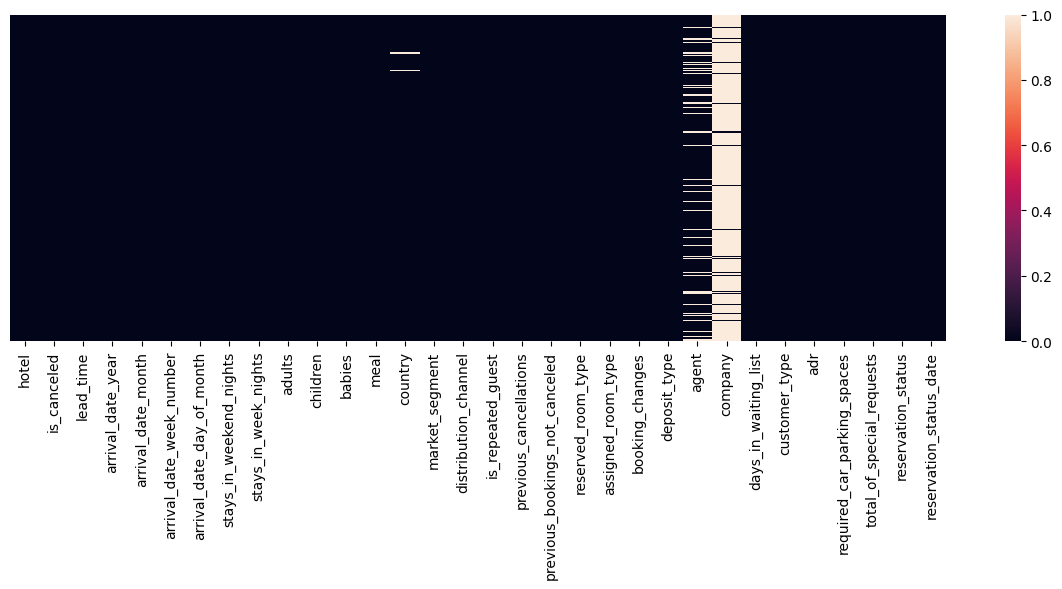

In [659]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(),yticklabels=False)
plt.tight_layout()

In [660]:
#Columnas como agent y company se trabajan como ID ademas tienen varios valores nulos
df[['agent','company']].dropna(subset=['agent','company']).head(10)

,agent,company
2392,240.0,113.0
2697,185.0,281.0
2867,334.0,281.0
2877,328.0,281.0
2878,326.0,281.0
2879,326.0,281.0
2880,334.0,281.0
2881,328.0,281.0
2882,326.0,281.0
2883,334.0,281.0


Al observar mas a detalle aquellos que cuentan con valores nulos observamos que country tiene algunos, mientras que en company tiene casi el 90% de sus datos ausentes, ademas se trabaja como ID, por lo que consideramos que es irrelevante y decidimos eliminarla, mientras que agent muestra una proporción manejable de nulos.


In [661]:
#eliminamos company por la cantidad de nulos
df.drop(['company'], axis = 1, inplace = True)
df.shape

(119390, 31)

In [662]:
#revisamos children,country y agent.



In [663]:
df["children"].value_counts()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [664]:
df["country"].value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [665]:
df['agent'].value_counts()

agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: count, Length: 333, dtype: int64

In [666]:
df['agent'].value_counts()
df = df[(df["agent"].notna())  & (df["country"].notna())  & (df["children"].notna())  ]
df.reset_index(drop=True, inplace=True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
1,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
3,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,No Deposit,303.0,0,Transient,103.00,0,1,Check-Out,2015-07-03
4,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,240.0,0,Transient,82.00,0,1,Canceled,2015-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102889,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
102890,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
102891,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
102892,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


Realizamos una limpieza exhaustiva del dataset eliminando valores nulos en las columnas 'agent', 'country' y 'children' y finalmente eliminamos los NaNs

In [667]:
## perdimos unos 17k filas pero no afecta tanto al análisis 
df.shape

(102894, 31)

In [668]:
# Revisamos que ya no haya valores nulls 
df.isna().isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [669]:
# revisamos igualmente los Nan
df.isna().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [670]:
# visualizamos las metricas estadisticas para entender como se estan comportando los datos para ver si hay valores atipicos que deberiamos eliminar
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894
mean,0.390314,111.740092,2016.156977,27.339155,15.786771,0.978181,2.589655,1.899926,0.111231,0.007697,0.014034,0.077215,0.024365,0.201780,86.545532,2.619579,104.679911,0.053035,0.605458,2016-07-29 04:59:34.599101952
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,26.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,73.000000,0.000000,0.000000,2016-01-31 00:00:00
50%,0.000000,79.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,96.300000,0.000000,0.000000,2016-08-03 00:00:00
75%,1.000000,169.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,127.800000,0.000000,1.000000,2017-02-12 00:00:00
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,5400.000000,3.000000,5.000000,2017-09-14 00:00:00
std,0.487823,107.681013,0.706117,13.279990,8.794042,1.003991,1.905941,0.490891,0.411982,0.097089,0.117631,0.758185,0.435759,0.624954,110.714259,18.797440,50.021697,0.225359,0.799342,NaN


Por lo que podemos observar en las metricas estadisticas podemos decir que ADR (Tarifa diaria promedio) tiene algunos valores atipicos negativos, ademas tiene ticks de 54000 lo cual nos parece extraño,
igualmente adults tiene reservas de hasta 55 personas, pero no lo descartamos ya que podrian ser reservas realizadas por alguna compañia, ademas lead_time nos parece un poco sospechoso ya que el maximo valor es de 700 el cual se aleja del promedio y el tercer cuartil.
Otro dato que nos intereso es que hay reservas con mas de 10 niños o bebes, lo cual nos podria estar indicando que hay algun error, por lo cual lo analisaremos a mayor detalle.

In [671]:
#cosulta de la isntancia donde adr es mayor a 500
df[df['adr']>500]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
39574,City Hotel,1,35,2016,March,13,25,0,1,2,...,1,Non Refund,12.0,0,Transient,5400.0,0,0,Canceled,2016-02-19
95409,City Hotel,0,0,2017,May,19,9,0,1,1,...,0,No Deposit,159.0,0,Transient,510.0,0,0,Check-Out,2017-05-10


In [672]:
#eliminamos los valores atipicos de adr
df.drop(df[df['adr']>500].index, inplace=True)

In [673]:
df[df['adr']<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
12205,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,2,No Deposit,273.0,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [674]:
df.drop(df[df['adr']<0].index, inplace=True)

Encontramos que hay una instancia con un valor de ADR de 5400, lo caul nos estaria indicando que probablemente fue un error al ingresar los datos y es por eso que procedimos a eliminarlo, igualmente, procedimos a borrar la instancia de 
adr que era negativo, ya que es imposible que esta sea negativa al ser un valor calculado de nunca es negativo

In [675]:

len(df[df['lead_time'] > 500])

479

Igualmente al visualisar las metricas estadisticas observamos que el valor maximo de lead_time era bastante alto en comparacion con el promedio, por lo cual decidimos ver cuantos valores eran mayores a 500 días, en donde encontramos que
se encontraron varias instancias, por lo cual decimimos que no las eliminariasmo ya que podria ser un comportamiento real, por ejemplo casos en donde las personas realizan reservaciones con bastante
anticipación por algun evento u ocación especial.

In [676]:
# mas de 10 adultos

In [677]:
#mas de 3 niños

In [678]:
#children ==10

In [679]:
#bebes > 10

In [713]:
# ver si hay reservaciones sin adultos pero con niños contar 
((df["adults"] == 0) & ((df["children"] > 0) | (df["babies"] > 0)))

0         False
1         False
2         False
3         False
4         False
          ...  
102889    False
102890    False
102891    False
102892    False
102893    False
Length: 102891, dtype: bool

In [712]:
# Reservas donde no hay adultos pero sí hay niños o bebés
(df[(df["adults"] == 0) & ((df["children"] > 0) | (df["babies"] > 0))]).shape[0]

206

In [682]:
# volvemos a hacer describe para ver los datos y revisar que no se nos pase nada
df.describe()



,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,102891.000000,102891.000000,102891.000000,102891.000000,102891.000000,102891.000000,102891.000000,102891.000000,102891.000000,102891.000000,102891.000000,102891.000000,102891.000000,102891.000000,102891.000000,102891.000000,102891.000000,102891.000000,102891.000000,102891
mean,0.390316,111.741114,2016.156962,27.339544,15.786852,0.978171,2.589653,1.899933,0.111234,0.007697,0.014025,0.077218,0.024346,0.201757,86.543740,2.619656,104.625585,0.053037,0.605476,2016-07-29 04:54:38.700760832
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,26.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,73.000000,0.000000,0.000000,2016-01-31 00:00:00
50%,0.000000,79.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,96.300000,0.000000,0.000000,2016-08-03 00:00:00
75%,1.000000,169.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,127.800000,0.000000,1.000000,2017-02-12 00:00:00
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,450.000000,3.000000,5.000000,2017-09-14 00:00:00
std,0.487823,107.681441,0.706117,13.279973,8.794033,1.003953,1.905927,0.490890,0.411988,0.097091,0.117593,0.758196,0.435722,0.624932,110.713873,18.797709,47.201647,0.225362,0.799347,NaN


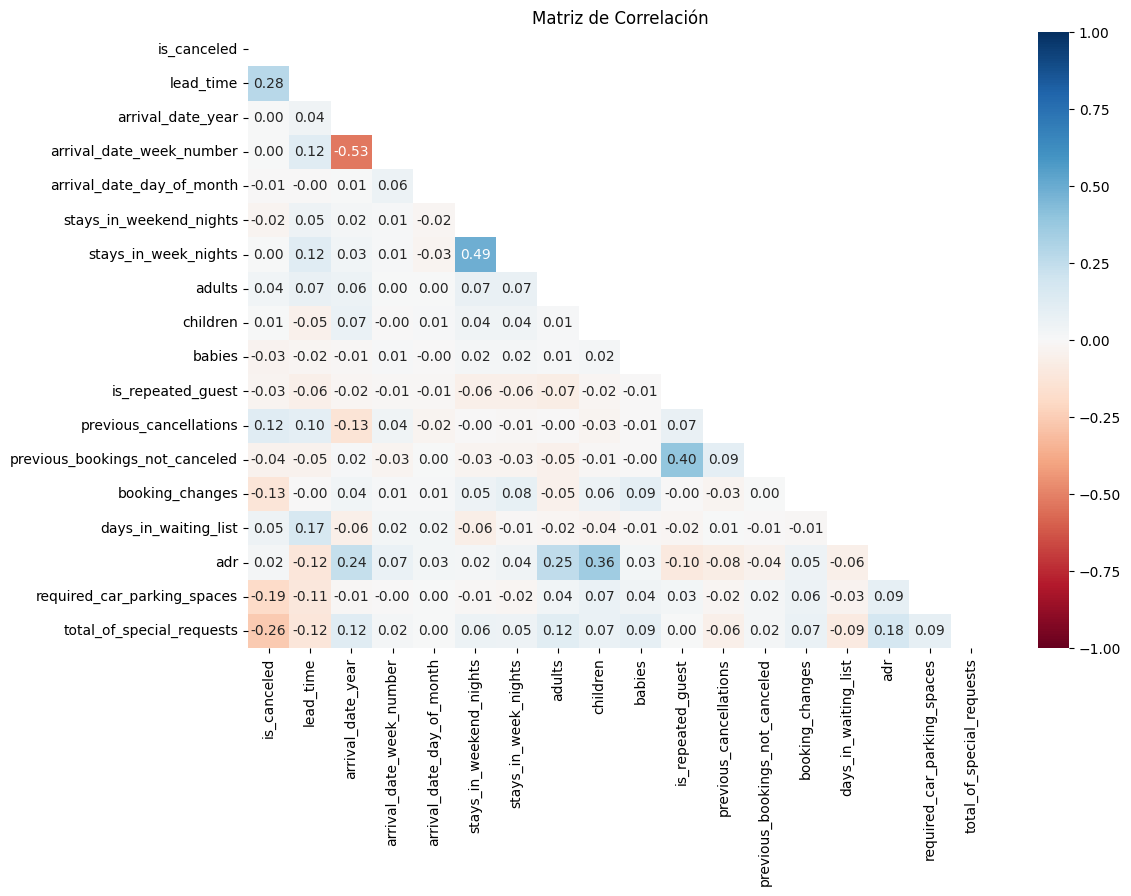

In [683]:
variables_numericas = ['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

correlacion = df[variables_numericas].corr()

plt.figure(figsize=(12,8))
sns.heatmap(
    correlacion,
    annot=True,
    fmt=".2f",
    vmin=-1,
    vmax=1,
    cmap="RdBu",
    mask=np.triu(correlacion)
)
plt.title("Matriz de Correlación")
plt.show()

La matriz de correlación revela que 'is_canceled' tiene correlaciones débiles con la mayoría de variables. 
El predictor más fuerte es 'lead_time' (0.29), indicando que reservas hechas con mayor anticipación tienen más probabilidad de cancelarse. 
Las correlaciones negativas más importantes son 'total_of_special_requests' (-0.23) y 'required_car_parking_spaces' (-0.20), 
sugiriendo que clientes con mayor compromiso (solicitudes especiales, estacionamiento) cancelan menos.

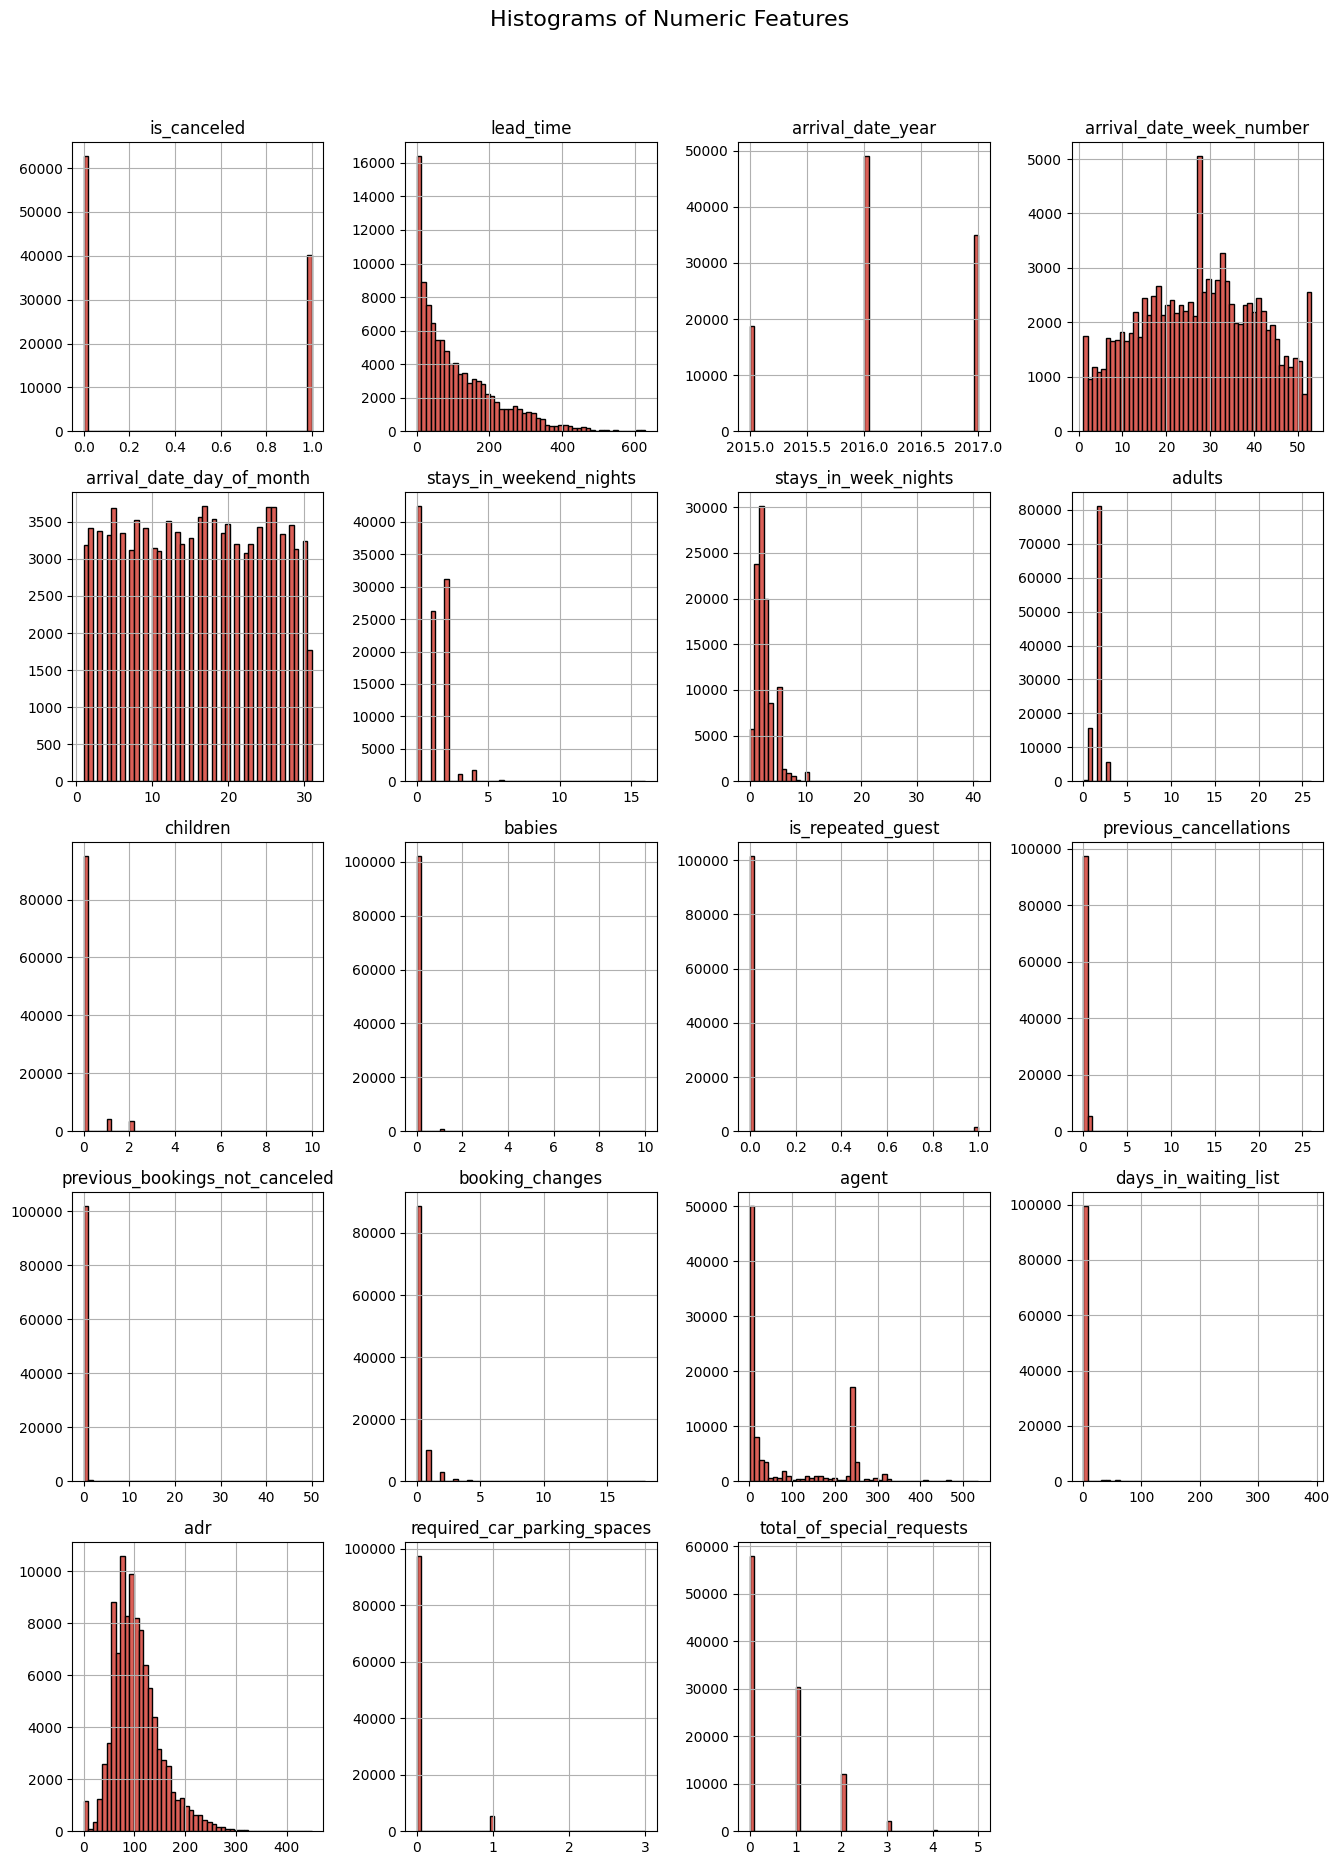

In [684]:
col_numericas = df.select_dtypes(include=['int64', 'float64']).columns
df[col_numericas].hist(bins=50, figsize=(15, 20), edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.show()

In [685]:
print(df['is_canceled'].value_counts())
print(df['is_canceled'].dtype)

# vemos que tan desvalanceada esta nuestra variable objetiva 


is_canceled
0    62731
1    40160
Name: count, dtype: int64
int64


codigo de las graficas


In [686]:
sns.color_palette("Paired")
# agarramos una paleta de colores 

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

/var/folders/64/4gbdgyc939b4_v9k9gyrf5sc0000gn/T/ipykernel_92241/2130185491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=df, palette="hls")


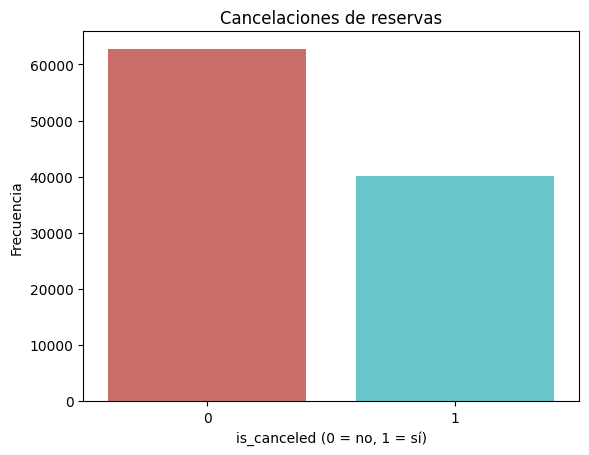

In [687]:
count = df['is_canceled'].value_counts()
sns.countplot(x='is_canceled', data=df, palette="hls")
plt.title("Cancelaciones de reservas")
plt.xlabel("is_canceled (0 = no, 1 = sí)")
plt.ylabel("Frecuencia")
plt.show()
# revisamos que tan balanceada esta nuestra variable objetivo y se ve bien no es tanto es como un 33% de diferencia 


Análisis de nuestra variable objetivo

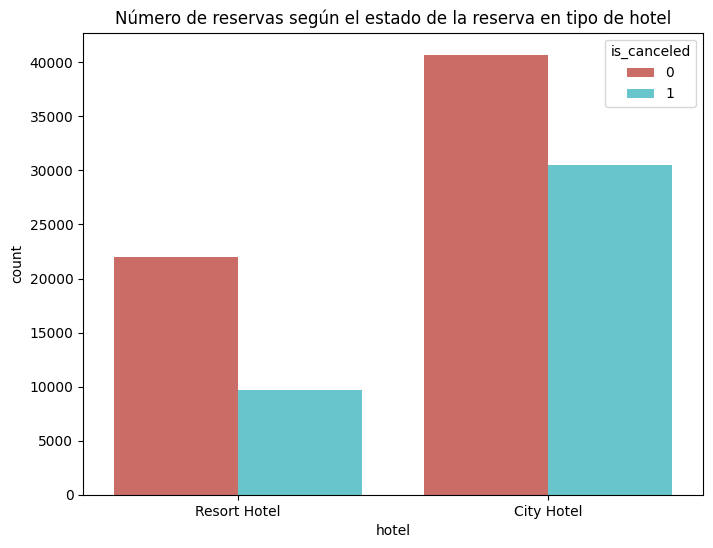

In [688]:
sns.set_palette("hls")
plt.figure(figsize = (8,6))
sns.countplot(x = 'hotel', data = df, hue = 'is_canceled',palette="hls")
plt.title("Número de reservas según el estado de la reserva en tipo de hotel")
plt.show()

In [689]:
df.groupby(['hotel'])['is_canceled'].value_counts()

hotel         is_canceled
City Hotel    0              40703
              1              30476
Resort Hotel  0              22028
              1               9684
Name: count, dtype: int64

Los hoteles de la ciudad tienen una tasa de cancelación más alta que los resorts.
Alrededor del 30% en los resorts y más del 50% en los urbanos.

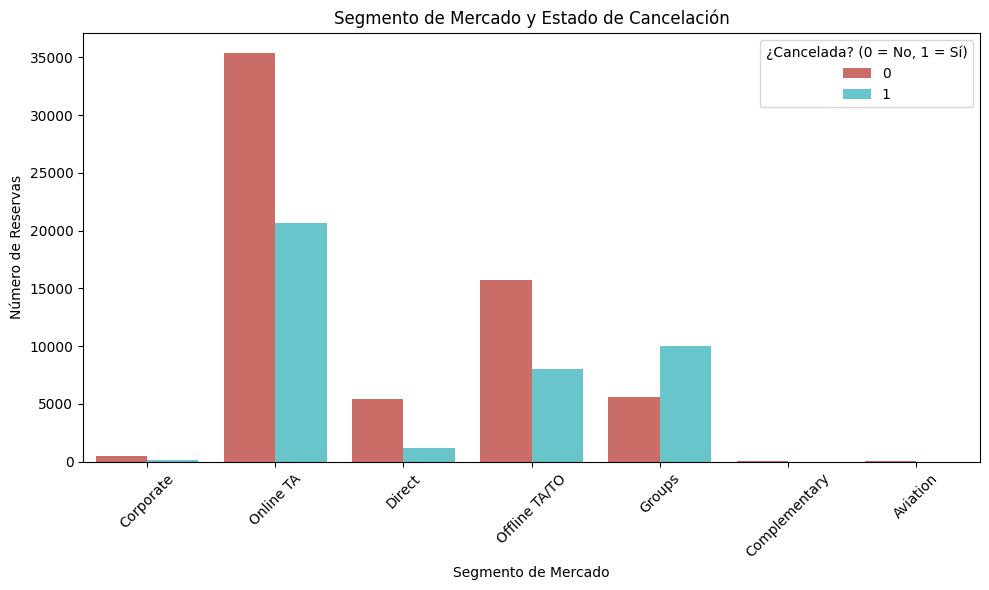

In [690]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

sns.countplot(
    x='market_segment',
    data=df,
    hue='is_canceled',
    palette="hls",
    ax=ax
)

ax.set_title("Segmento de Mercado y Estado de Cancelación")
ax.set_xlabel("Segmento de Mercado")
ax.set_ylabel("Número de Reservas")
ax.legend(title="¿Cancelada? (0 = No, 1 = Sí)")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Las tasas de cancelación suelen ser altas en las reservas online, presencial y de grupo.

Text(0.5, 1.0, 'Lead Time por Año de Llegada y Cancelación')

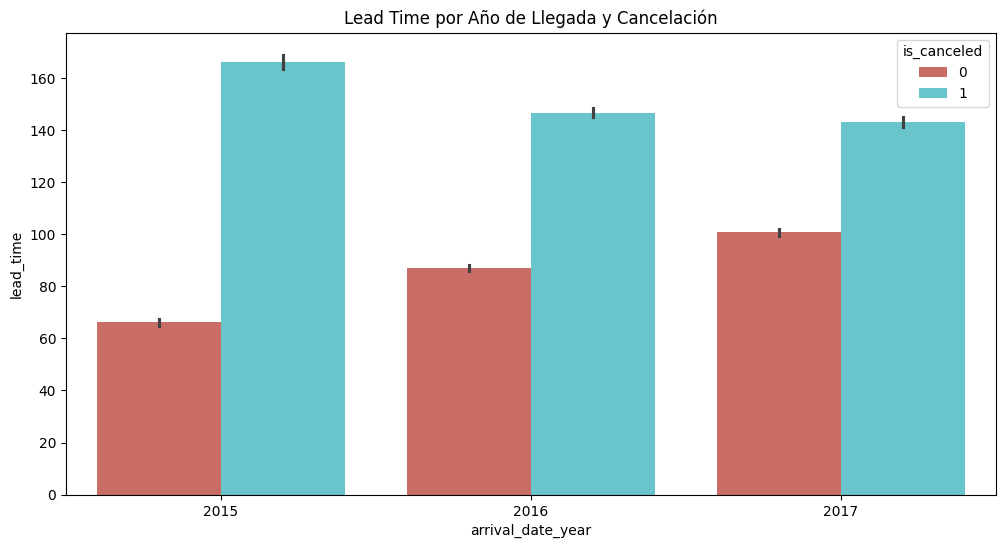

In [691]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time', hue='is_canceled', data=df, palette="hls")
plt.title("Lead Time por Año de Llegada y Cancelación")

In [692]:
df.groupby(['arrival_date_year'])['is_canceled'].mean()

arrival_date_year
2015    0.395160
2016    0.383284
2017    0.397565
Name: is_canceled, dtype: float64

Text(0.5, 1.0, 'Reservas por Año de Llegada y Tipo de Hotel')

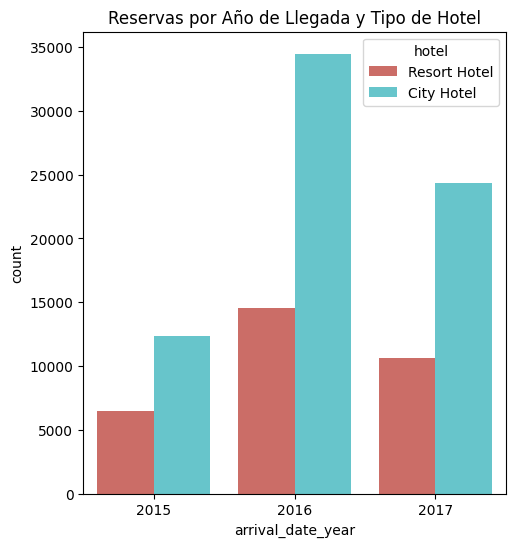

In [693]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x='arrival_date_year', hue='hotel', data=df, palette="hls")
plt.title("Reservas por Año de Llegada y Tipo de Hotel")

/var/folders/64/4gbdgyc939b4_v9k9gyrf5sc0000gn/T/ipykernel_92241/2356601939.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='customer_type', data=df, ax=ax[0],palette="hls")


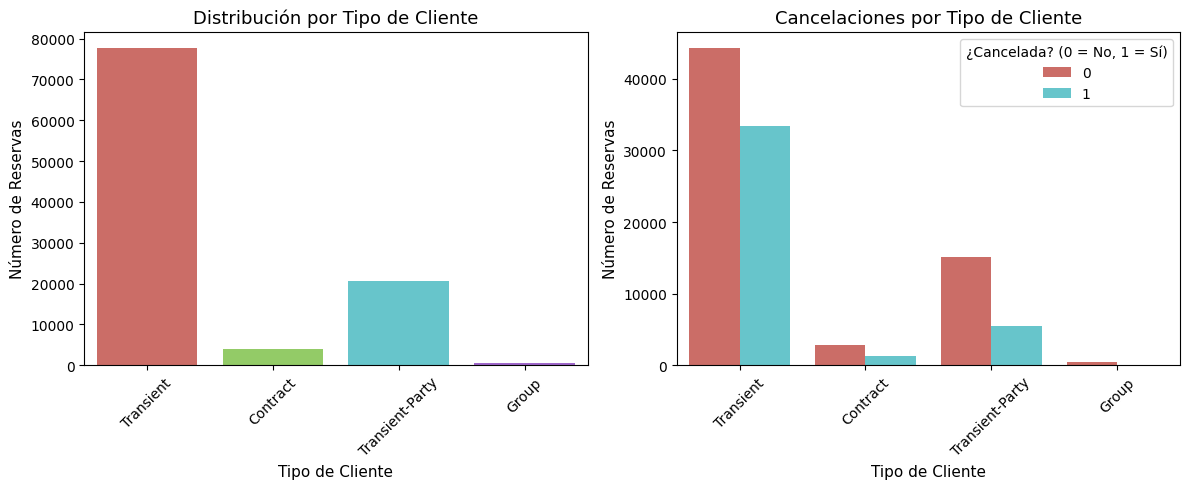

In [694]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))


sns.countplot(x='customer_type', data=df, ax=ax[0],palette="hls")
ax[0].set_title("Distribución por Tipo de Cliente", fontsize=13)
ax[0].set_xlabel("Tipo de Cliente", fontsize=11)
ax[0].set_ylabel("Número de Reservas", fontsize=11)
ax[0].tick_params(axis='x', rotation=45)


sns.countplot(x='customer_type', data=df, hue='is_canceled', ax=ax[1], palette="hls")
ax[1].set_title("Cancelaciones por Tipo de Cliente", fontsize=13)
ax[1].set_xlabel("Tipo de Cliente", fontsize=11)
ax[1].set_ylabel("Número de Reservas", fontsize=11)
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(title="¿Cancelada? (0 = No, 1 = Sí)", fontsize=10)

plt.tight_layout()
plt.show()


El tipo de cliente Transient concentra la mayoría de las reservas y también la mayor proporción de cancelaciones.
En cambio, Contract casi no cancela, mostrando un comportamiento mucho más estable.

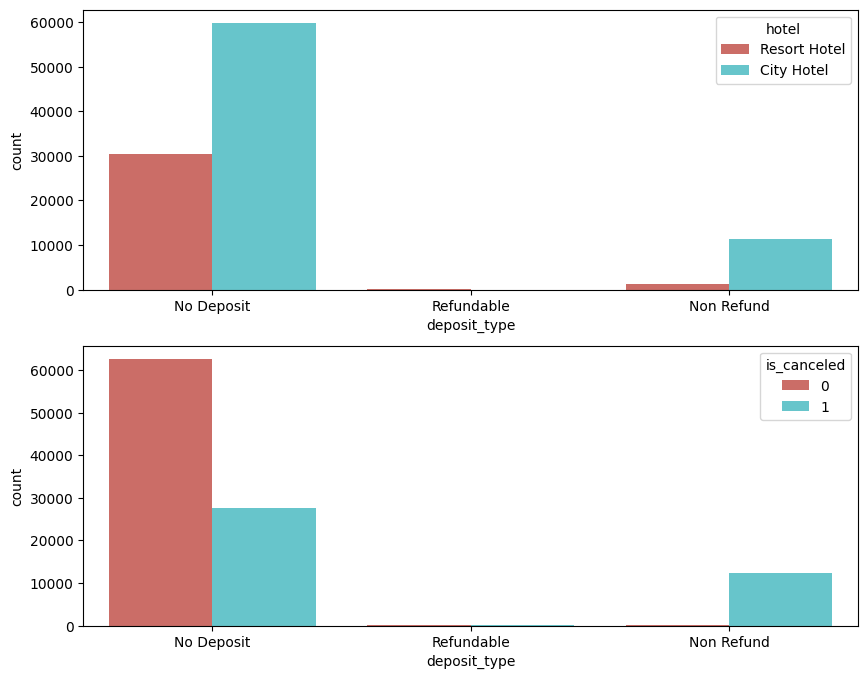

In [695]:
_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,8))
sns.countplot(x = 'deposit_type', data = df, hue = 'hotel', ax = ax[0],palette="hls")
sns.countplot(x = 'deposit_type', data = df, hue = 'is_canceled', ax = ax[1], palette="hls")
plt.show()

/var/folders/64/4gbdgyc939b4_v9k9gyrf5sc0000gn/T/ipykernel_92241/2767393659.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'arrival_date_month', data = df, ax = ax[0], order = order, palette="hls")


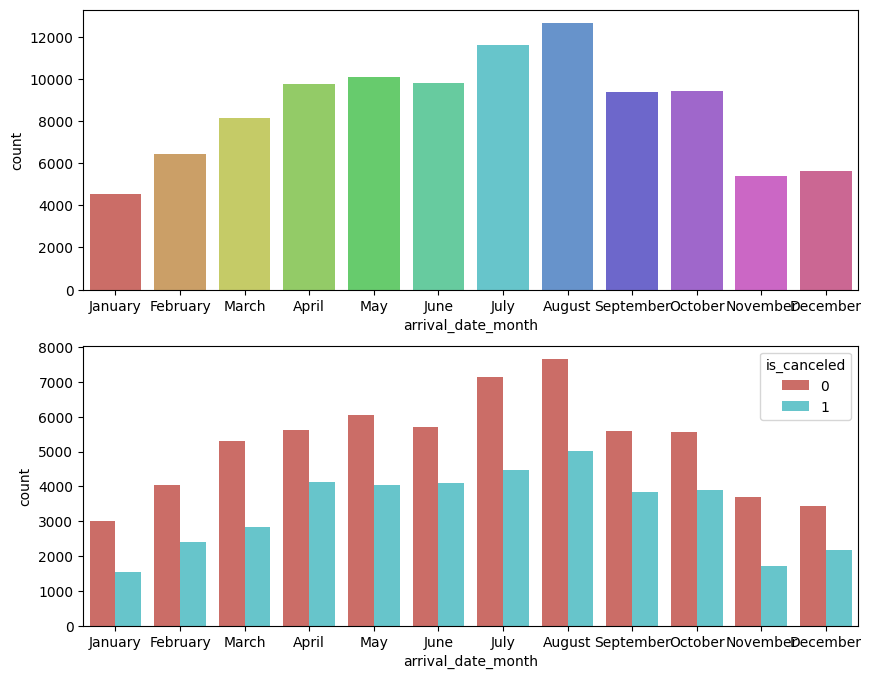

In [696]:
order = ['January',
 'February', 'March' ,'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December' ]

_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,8))
sns.countplot(x = 'arrival_date_month', data = df, ax = ax[0], order = order, palette="hls")
sns.countplot(x = 'arrival_date_month', data = df, hue = 'is_canceled', ax = ax[1], order = order, palette="hls")
plt.show()

Box plots of numerical features vs cancellation status falta

Cancelación debido a la diferencia entre el tipo de habitación deseada y la asignada¶

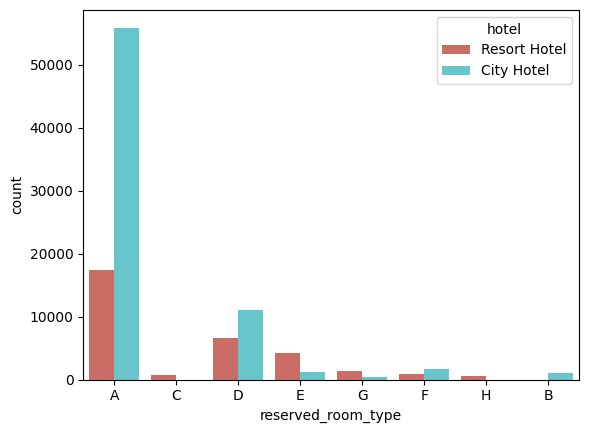

In [697]:
sns.countplot(x = 'reserved_room_type', hue = 'hotel', data = df, palette="hls")
plt.show()


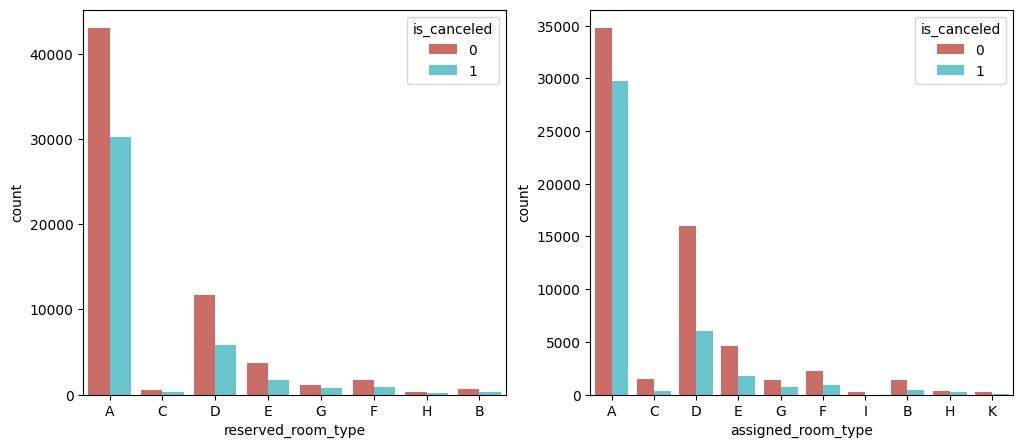

In [698]:

_, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (12,5))
sns.countplot(x = 'reserved_room_type', hue = 'is_canceled', data = df,  ax = ax[0], palette="hls")
sns.countplot(x = 'assigned_room_type', hue = 'is_canceled', data = df,  ax = ax[1], palette="hls")
plt.show()


Los tipos de habitación A, D y E tienen un nivel de reserva y asignación bastante alto. Sin embargo, como resultado, también tienen una alta tasa de cancelación.  un motivo de cancelación podría ser la asignación de un tipo de habitación no deseado. 

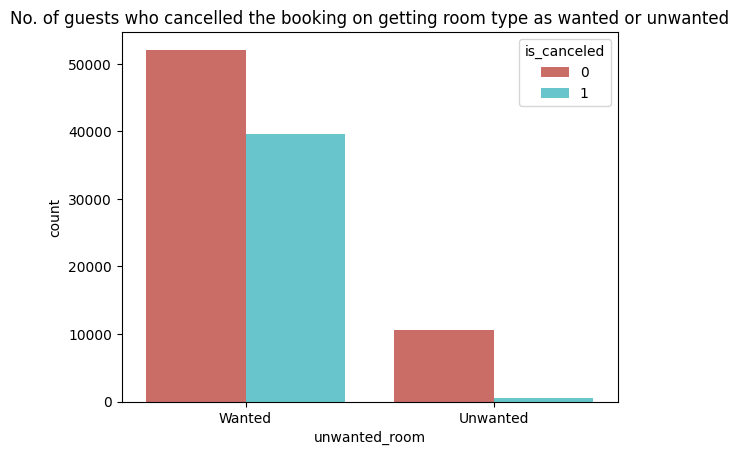

In [699]:
unwanted_room = np.where(df['reserved_room_type'] == df['assigned_room_type'], 'Wanted', 'Unwanted')
df['unwanted_room'] = unwanted_room
sns.countplot(x = 'unwanted_room', data = df, hue = 'is_canceled', palette="hls")
plt.title("No. of guests who cancelled the booking on getting room type as wanted or unwanted")
plt.show()


Aunque inicialmente pensamos que una reserva se cancelaría con mayor probabilidad cuando el tipo de habitación asignado no coincidía con el solicitado, los datos muestran que la tasa de cancelación en estos casos es muy baja.
Esto significa que la diferencia entre la habitación reservada y la asignada no parece influir de forma significativa en las cancelaciones.

MODELO

In [700]:
df.select_dtypes(include='object').columns


Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status', 'unwanted_room'],
      dtype='object')

In [701]:
df.drop(columns=['reservation_status', 'reservation_status_date',
'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month'], inplace=True)


eliminamos estas porque esas columnas no existen en el momento real de la reserva, solo existen después del resultado.

In [702]:
hotel={'Resort Hotel':0 , 'City Hotel':1 }


In [703]:
df['hotel']=df['hotel'].map(hotel)

In [704]:
#one hot encoding 
df = pd.get_dummies(df, drop_first=True, dtype=int)


In [705]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,unwanted_room_Wanted
0,0,0,13,2015,1,1,1,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,14,2015,1,2,2,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,14,2015,1,2,2,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,9,2015,1,2,2,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,1,85,2015,1,3,2,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [706]:
X= df.drop('is_canceled', axis = 1)
y = df['is_canceled']

In [707]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.30, 
    random_state=40
)


RANDOM FOREST RESULTS

Accuracy: 0.8885253336788907

Confusion Matrix:
 [[17481  1339]
 [ 2102  9946]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     18820
           1       0.88      0.83      0.85     12048

    accuracy                           0.89     30868
   macro avg       0.89      0.88      0.88     30868
weighted avg       0.89      0.89      0.89     30868



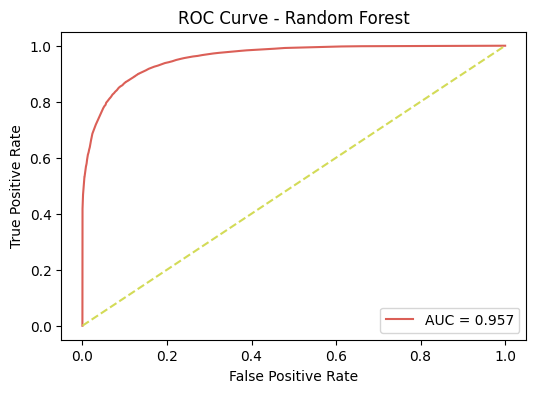

In [708]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=40, stratify=y
)

rf = RandomForestClassifier(n_jobs=-1, random_state=40)
rf.fit(X_train, y_train)


rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:,1]


print("RANDOM FOREST RESULTS\n")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

fpr, tpr, _ = roc_curve(y_test, rf_prob)
auc_rf = roc_auc_score(y_test, rf_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_rf:.3f}")
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()



In [709]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ===========================
# Entrenamiento
# ===========================
xgb = XGBClassifier(
    n_jobs=-1,
    random_state=40,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

# ===========================
# Predicciones
# ===========================
xgb_pred = xgb.predict(X_test)
xgb_prob = xgb.predict_proba(X_test)[:,1]

# ===========================
# Métricas
# ===========================
print(" XGBOOST RESULTS\n")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))

# ===========================
# ROC & AUC
# ===========================
fpr, tpr, _ = roc_curve(y_test, xgb_prob)
auc_xgb = roc_auc_score(y_test, xgb_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_xgb:.3f}")
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'xgboost'